<a href="https://colab.research.google.com/github/SzymSAS/lecture1/blob/main/Drzewa_decyzyjne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from sklearn import datasets
data = datasets.load_iris()

In [8]:
print(data.data.shape)
print(data.target.shape)
print(data.feature_names)
print(data.target_names)

(150, 4)
(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


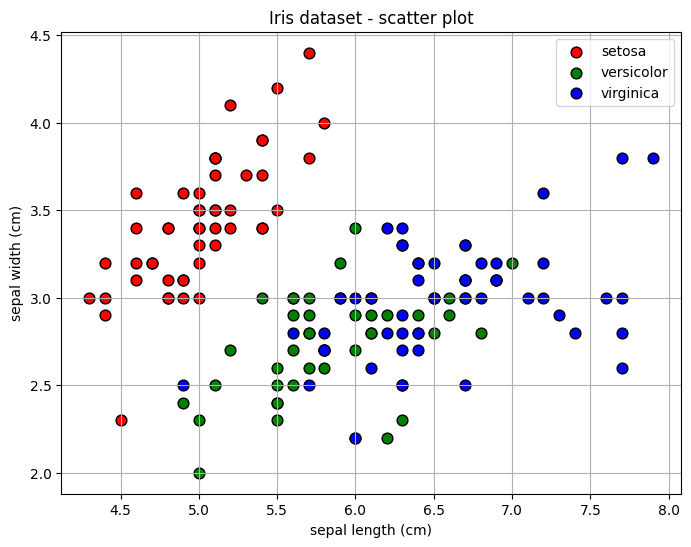

In [14]:
import matplotlib.pyplot as plt
from sklearn import datasets

data = datasets.load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

x_index = 0
y_index = 1

plt.figure(figsize=(8, 6))
for label, color in zip(range(3), ['red', 'green', 'blue']):
    plt.scatter(X[y == label, x_index], X[y == label, y_index],
                label=target_names[label], c=color, edgecolor='k', s=60)

plt.xlabel(feature_names[x_index])
plt.ylabel(feature_names[y_index])
plt.title("Iris dataset - scatter plot")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
import numpy as np
from sklearn import datasets
from math import log2

data = datasets.load_iris()
X = data.data
y = data.target
feature_index = data.feature_names.index('petal width (cm)')

def entropy(y_subset):

    counts = np.bincount(y_subset)
    probabilities = counts[np.nonzero(counts)] / len(y_subset)
    return -np.sum(probabilities * np.log2(probabilities))

def information_gain(y, x_column, threshold):

    parent_entropy = entropy(y)

    left_mask = x_column <= threshold
    right_mask = x_column > threshold

    y_left = y[left_mask]
    y_right = y[right_mask]

    n = len(y)
    n_left = len(y_left)
    n_right = len(y_right)

    if n_left == 0 or n_right == 0:
        return 0

    weighted_entropy = (n_left / n) * entropy(y_left) + (n_right / n) * entropy(y_right)

    return parent_entropy - weighted_entropy

#petal width = 0.5
ig_05 = information_gain(y, X[:, feature_index], 0.5)

# petal width = 0.38
ig_038 = information_gain(y, X[:, feature_index], 0.38)

print(f"Information Gain dla podziału petal width = 0.5: {ig_05:.4f}")
print(f"Information Gain dla podziału petal width = 0.38: {ig_038:.4f}")


Information Gain dla podziału petal width = 0.5: 0.8643
Information Gain dla podziału petal width = 0.38: 0.6195


In [16]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Drzewo decyzyjne
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

#Las losowy
forest_clf = RandomForestClassifier(n_estimators=15, random_state=42)
forest_clf.fit(X_train, y_train)
y_pred_forest = forest_clf.predict(X_test)

#Ocena
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_forest = accuracy_score(y_test, y_pred_forest)

print(f"Dokładność drzewa decyzyjnego: {accuracy_tree:.4f}")
print(f"Dokładność lasu losowego (15 drzew): {accuracy_forest:.4f}")

Dokładność drzewa decyzyjnego: 1.0000
Dokładność lasu losowego (15 drzew): 1.0000
